# Visualización de datos

Semana Tec

Profesores: Luz Eunice Angeles /José Ignacio Treviño

## Librerías de visualización de datos

* **Matplotlib** es la librería más utilizada para crear gráficos en Python. 

  * Está basada en la graficación de Matlab.
  * Permite agregar elementos sobre el gráfico, modificar títulos y leyendas, cambiar colores, entre muchas otras funciones.
  * Como desventaja, para cada detalle que queramos agregar es probable que requiramos agregar una línea de código. 

* **Seaborn** es una librería que está basada en Matplotlib.
  * Tiene la ventaja de que los gráficos son más bonitos por defecto y que utiliza menos líneas de código.
  * Como desventaja, para detalles muy específicos requiere que agreguemos código de matplotlib.

* **Plotly** es una librería para crear gráficos tipo dashboard. 
  * Las visualizaciones creadas con esta librería son interactivas.
  * Como principal desventaja, el código para generar este tipo de gráficos es más complejo que los casos anteriores. 

## Matplotlib

* La utilizamos cuando trabajamos con datos simples.
* Nos sirve para configurar cada elemento del gráfico:
  * Tamaño de la imagen.
  * Tipo de gráfico.
  * Colores y marcas
  * Leyendas y nombres de los ejes.
  * Título.
  * Cuadrícula, ejes primarios y secundarios.
* Para utilizarla, necesitamos imporatarla:
```python
import matplotlib.pyplot as plt
```
* Normalmente usamos el siguiente formato:
```python
# Para configurar el tamaño de la imagen
fig = plt.figure(figsize=(<width, height>)) 
# Con la siguiente instruccion dibujamos un gráfico de línea
plt.plot(<x>, <y>, color = <"color">, label = <"etiqueta">)
# Las siguientes líneas son para agregar elementos del gráfico.
plt.title(<"título">) # Para agregar el título
plt.xlabel(<"título del eje x">) # Etiqueta del eje X
plt.ylabel(<"título del eje y">) # Etiqueta del eje Y
plt.legend(loc='best') # Para mostrar las etiquetas de datos.
plt.grid(<Booleano>) # Para agregar cuadrícula
```


* Vamos a graficar la función $y_1 = 0.5\cdot x$



In [ ]:
# Primero hay que crear los datos
import numpy as np

x = np.linspace(0,5,num=50)
y1 = 0.5*x

# Importamos matplotlib para graficar
import matplotlib.pyplot as plt
# Configuramos el tamaño de imagen
fig = plt.figure(figsize=(6,4))
# Agregamos la gráfica
plt.plot(x, y1, color='b', label='y=0.5x')
# Agregamos títulos a los ejes y al gráfico
plt.xlabel('x')
plt.ylabel('y')
plt.title('Función y=0.5x')
# Cuando tenemos una sola línea, legend no hace mucho sentido.
plt.legend(loc='best')

* Podemos agregar más de una línea en un mismo gráfico.

* Vamos a graficar la función $y_2 = \sin(x)$ sobre el mismo gráfico anterior.


In [ ]:
# Hay que crear el vector de la segunda función
y2 = np.sin(x)

# Usamos el mismo código del gráfico anterior, pero agregamos un segundo plot
# Configuramos el tamaño de imagen
fig = plt.figure(figsize=(6,4))
# Agregamos la 1ra gráfica. En color, la 'b' significa blue.
plt.plot(x, y1, color='b', label='y=0.5x')
# Agregamos la 2da gráfica. Aquí cambiamos el color a rojo.
plt.plot(x, y2, color='r', label='y=sin(x)')

# Agregamos títulos a los ejes y al gráfico
plt.xlabel('x')
plt.ylabel('y')
plt.title('Gráfico de dos funciones')
# Aquí la leyenda hace mucho más sentido
plt.legend(loc='best')
# Agregamos la cuadrícula para que se vea mejor
plt.grid(True)

* `plot` grafica *líneas continuas*.
* Si queremos graficar *puntos*, usamos la función `scatter`.
* Podemos mezclar los tipos de gráfico en una misma imagen.

In [ ]:
# Configuramos el tamaño de imagen
fig = plt.figure(figsize=(6,4))

# Agregamos la 2da gráfica primero. El orden no importa.
plt.plot(x, y2, color='r', label='y=sin(x)')
# Agregamos la 1ra gráfica. Cambiamos a un scatter
plt.scatter(x, y1, color='b', label='y=0.5x')

# Agregamos títulos a los ejes y al gráfico
plt.xlabel('x')
plt.ylabel('y')
plt.title('Gráfico de dos funciones')
# Aquí la leyenda hace mucho más sentido
plt.legend(loc='best')
# Agregamos la cuadrícula para que se vea mejor
plt.grid(True)

* Cuando trabajamos con datos *tabulares*, en matplotlib tenemos que configurar cada elemento del gráfico y puede resultar en muchas líneas de código.

* Seaborn nos ayuda mucho cuando queremos graficar DataFrames de manera rápida y en menos líneas de código.

## Seaborn
* Para graficar con Seaborn, la tabla debe tener **formato largo**.
* Cada columna debe representar una variable y cada renglón una observación.
* Cuando en las columnas tenemos valores de una variable (por ejemplo, distintos años), la tabla no tiene formato largo.
* La forma general de graficar con Seaborn es:
```python
# Importamos la librería
import seaborn as sns
# Seaborn hace más bonitas las gráficas.
# Usamos set para definir el estilo de Seaborn para todas las gráficas.
sns.set()
# La gráfica en sí:
sns.<tipo_de_grafico>(data = <df>, x=<"columna X">, 
                    y = <"columna y"> , hue = <"columna color">, 
                    size = <"columna tamaño">, style = <'columna estilo'>, 
                    palette = <'paleta de colores'>, cmap,...)
```

* Vamos a cargar el dataset *Iris* y hacer algunas gráficas.

In [ ]:
# Si trabajamos en Google Colaboratory corremos las siguientes lineas de código
from google.colab import drive
drive.mount('/gdrive')

In [ ]:
# Nos cambiamos a la carpeta donde tengamos el repositorio
%cd '/gdrive/MyDrive/SemanaTec/arte-analitica'

In [ ]:
# Cargamos el dataset
import pandas as pd
import numpy as np

iris_df = pd.read_csv('data/iris.csv')
iris_df.head()

In [ ]:
# Importamos seaborn
import seaborn as sns
sns.set()

### Histogramas.

* Los histogramas nos ayudan a visualizar la **distribución** de una **variable numérica**. 

* El eje $x$ está dividido en *secciones* o *cajas*. Este parámetro se llama *bins* en la función de Seaborn.

* El eje $y$ muestra cuántos datos cayeron en cada *caja* en las que se dividió la variable que estamos graficando.

In [ ]:
# Graficamos un histograma con histplot. 
# Sólo hay que definir el DF donde tomamos los datos y cuáles columnas queremos graficar.
sns.histplot(data=iris_df, x='Sepal.Length')

* Con el parámetro *bins* controlamos el número de cajas. Por defecto, *bins= 10*.
* Entre más cajas grafiquemos, hay mayor detalle.
* Si el número de cajas es muy grande, no obtendremos una interpretación correcta del gráfico.
* Si el número de cajas es muy chico para el mismo problema.
* El parámetro *kde* nos sirve para obtener un estimado de la función de distribución.

In [ ]:
sns.histplot(data=iris_df, x='Sepal.Length', bins=9, kde=True)

* El parámetro *hue* separa los datos y pone un color diferente dependiendo de la variable que utilicemos.
* Los parámetros como *hue*, y *style* solamente son útiles cuando tenemos **variables categóricas** 

In [ ]:
# Usamos la variables Species para separar los datos.
# En histogramas, al hacer esta separación debemos tener pocas categorías.
sns.histplot(data=iris_df, x='Sepal.Length', hue='Species', kde=True)

* Por defecto, Seaborn usa el nombre de las columnas para definir las etiquetas de los ejes. 
* Podemos usar las funciones de matplotlib para modificar los elementos del gráfico y el tamaño.

In [ ]:
# Tamaño de la imagen
fig = plt.figure(figsize=(9,6))
# Gráfico
sns.histplot(data=iris_df, x='Sepal.Length', hue='Species', bins=12,kde=True)
# Ejes y título
plt.xlabel('Longitud del sépalo')
plt.ylabel('Frecuencia')
plt.title('Comparación de la distribución del sépalo por especie')

### Gráficos de caja (Boxplot)

* Un diagrama de caja (y bigotes) es un método estandarizado para representar gráficamente una serie de datos numéricos a través de sus cuartiles. 

* Este gráfico es muy útil porque nos permite visualizar de manera rápida estos estadísticos:
  * 1er cuartil
  * 3er cuartil
  * Mediana
  * Máximo y mínimo
  * Valores atípicos.

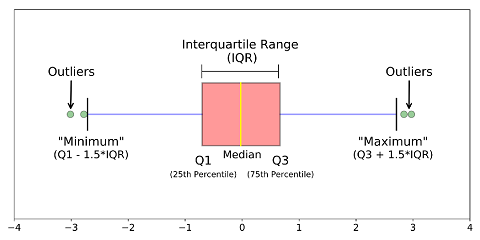

* La usamos cuando queremos comparar **una variable numérica** que podemos separar en varios grupos o **categorías**.

* Es muy similar al último histograma que realizamos, pero la comparación es más clara.

* La ventaja es que podemos agregar más de dos categorías sin perder visibilidad de los datos.

In [ ]:
# Tamaño de la imagen
fig = plt.figure(figsize=(6,4))
# Gráfico boxplot
sns.boxplot(data=iris_df, x='Sepal.Width')
# Ejes y título
plt.title('Histograma del ancho de sépalo')

* Los puntos en el histograma representan **datos atípicos** (outliers). 
* Estos datos presentan valores extremos, es decir, que están muy por encima comparados con el resto de las observaciones.
* Ahora, veamos cómo se distribuye el ancho de sépalo por especie. Esta separación la hacemos usando la variable *Species* en el eje y.


In [ ]:
# Tamaño de la imagen
fig = plt.figure(figsize=(7,5))
# Gráfico boxplot
sns.boxplot(data=iris_df, x='Sepal.Width', y='Species')
# Ejes y título
plt.title('Histograma del ancho de sépalo por especie')

* La ventaja de los diagramas de caja es que podemos invertir los ejes dependiendo de cómo se presenten mejor los datos.

* Si la variable categorica que usamos para separar los datos tiene muchos niveles, lo recomendable es usarla en el eje *y*.

In [ ]:
# Tamaño de la imagen
fig = plt.figure(figsize=(8,6))
# Gráfico boxplot. Invertimos los ejes.
sns.boxplot(data=iris_df, y='Sepal.Width', x='Species')
# Ejes y título. Colocamos la etiqueta correcta de acuerdo a la orientación.
plt.title('Histograma del ancho de sépalo por especie')
plt.xlabel('Especie')
plt.ylabel('Ancho del sépalo')

### Mapa de calor (Heatmap)

* Esta técnica de visualización de datos nos muestra la magnitud de una variable que se distribuye en **dos dimensiones**. 
* En esencia, es colorear una **tabla** donde la *intensidad* del color corresponde al *valor* de cada celda. 

* Es muy útil cuando tenemos tablas en formato ancho, donde tenemos valores de variables en las columnas y en las filas. 

* Normalmente, lo utilizamos para visualizar una **matriz de correlación**.

In [ ]:
# Vamos a graficar la matriz de correlación del dataset Iris
iris_corr = iris_df.corr()

# Para graficar el mapa de calor usamos heatmap. No necesitamos especificar x ni y
sns.heatmap(data=iris_corr)

* La barra lateral es el **mapa de color**, que nos muestra la correspondencia del valor de la tabla a un color en específico. 

* Existen diferentes mapas de colores que podemos utilizar, la lista está en la siguiente liga:

  * [Mapas de Color. Matplotlib](https://matplotlib.org/stable/tutorials/colors/colormaps.html)

* Debemos escoger el mapa de color y la escala correcta dependiendo de los datos.

* Sabemos que la correlación va de -1 a 1. Esta es nuestra escala.

* Nos interesa saber si la correlacióne es positiva o negativa, nos conviene un mapa **divergente**.

In [ ]:
# Gráfico heatmap. Seleccionamos los valores extremos con vmin y vmax.
# El mapa de color que usaremos es de un extremo azul y del otro rojo.
# Con annot podemos desplegar el valor de cada celda
# Con square hacemos que el gráfico sea simétrico en tamaño de ejes
sns.heatmap(data=iris_corr, vmin=-1, vmax=1, cmap = 'RdBu', annot=True, square = True)

### Gráficos de barra

* Esta visualización la usamos cuando queremos graficar los valores de una **variable categórica**. 

* Es el equivalente al *conteo* de las apariciones de cada clase de la variable categórica.

* Con Seaborn, python hace el conteo automáticamente.

In [ ]:
# Vamos a graficar el conteo de la variable categórica (Species)
# Tamaño de la imagen
fig = plt.figure(figsize=(6,4))

# Gráfico countplot para hacer barras con el número de apariciones de cada especie.
sns.countplot(data=iris_df, x = 'Species')
# Ejes y título. Colocamos la etiqueta correcta de acuerdo a la orientación.
plt.title('Observaciones de cada especie')
plt.xlabel('Especie')
plt.ylabel('Frecuencia')

* Al igual que el boxplot, podemos invertir los ejes si nos conviene. 

* Si hay muchas categorías, lo mejor es tenerlas en el eje Y.

In [ ]:
# Vamos a graficar el conteo de la variable categórica (Species)
# Tamaño de la imagen
fig = plt.figure(figsize=(6,4))

# Gráfico countplot para hacer barras con el número de apariciones de cada especie.
sns.countplot(data=iris_df, y = 'Species')
# Ejes y título. Colocamos la etiqueta correcta de acuerdo a la orientación.
plt.title('Observaciones de cada especie')
plt.xlabel('Frecuencia')
plt.ylabel('Especie')

### Gráfico de dispersión (scatterplot).
* Los usamos cuando queremos ver la relación entre **dos variables numéricas**.

* Podemos usar variables categóricas para modificar el estilo o el color de cada punto.

* Es más rápido usar esta función que con matplotlib.



In [ ]:
# Vamos a graficar la relación entre el ancho y la longitud del sépalo.

# Tamaño de la imagen
fig = plt.figure(figsize=(6,4))

# Gráfico scatterplot. 
sns.scatterplot(data=iris_df, x = 'Sepal.Length', y='Sepal.Width', hue='Species')
# Ejes y título. Colocamos la etiqueta correcta de acuerdo a la orientación.
plt.title('Relación entre el ancho y la longitud del sépalo por especie')
plt.xlabel('Longitud del sépalo')
plt.ylabel('Ancho del sépalo')

* Si queremos visualizar la relación uno a uno entre todas las variables numéricas, podemos usar la función *pairplot*.

* La estructura es similar a la matriz de correlación.

In [ ]:
# Pairplot es una versión más compleja y grande del gráfico de dispersión.
sns.pairplot(data=iris_df, hue='Species')

# Actividad

- Alejandro Meléndez Torres - A00832494 
- José Gerardo Cantú García - A00830760
- Sergio Hiroshi Carrera Monnier – A01197964

## Entregar 
Archivo PDF de la actividad y la liga de la actividad en su repostitorio.

## Nota: 
Todas las tareas entregadas fuera de la fecha limite se califican sobre 50 de los 100 puntos posibles.

### Highway MPG dataset

Este dataset contiene variables medidas por la agencia de protección ambiental de 38 modelos de vehículo diferentes de 1999 a 2008. Las variables que se registraron fueron:

* **manufacturer**: nombre del fabricante.
* **model**: nombre del modelo.
* **displ**: desplacamiento del motor, en litros.
* **year**: año de fabricación.
* **cyl**: número de cilindros.
* **trans**: tipo de transmisión.
* **drv**: tipo de tracción, f-delantera, r-trasera, 4- 4 llantas
* **cty**: rendimiento del motor en ciudad, en millas por galón.
* **hwy**: rendimiento del motor en carretera, en millas por galón.
* **fl**: tipo de combustible.
* **class**: tipo de vehículo.

Los datos están en el archivo `auto-mpg.csv` dentro de la carpeta `data`.

In [ ]:
# Carga las librerías y datos
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd content/drive/MyDrive/semanaTec-Sep21/arte-analitica/data

/content/drive/MyDrive/semanaTec-Sep21/arte-analitica/data


In [ ]:
import pandas as pd

df = pd.read_csv("auto-mpg.csv")

In [ ]:
# ¿Cuántas datos hay de cada fabricante? Muéstralo en un gráfico.
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()

Text(0, 0.5, 'Numero de datos')

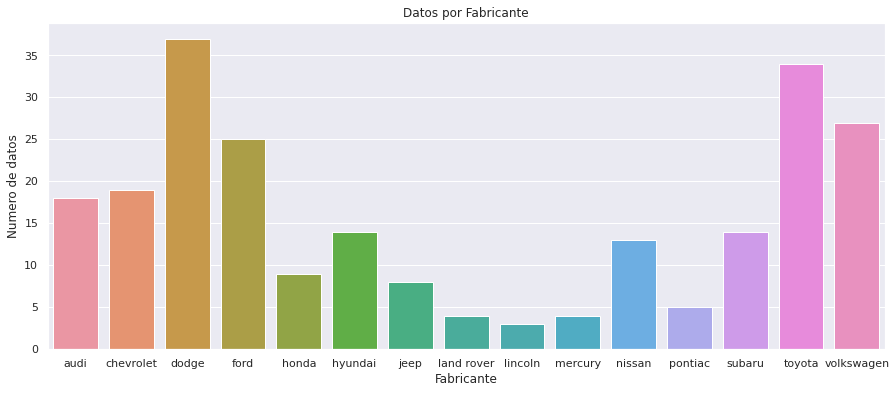

In [ ]:
fig = plt.figure(figsize=(15,6))

sns.countplot(data = df, x = "manufacturer")

plt.title('Datos por Fabricante')
plt.xlabel('Fabricante')
plt.ylabel('Numero de datos')

Text(0, 0.5, 'Numero de datos')

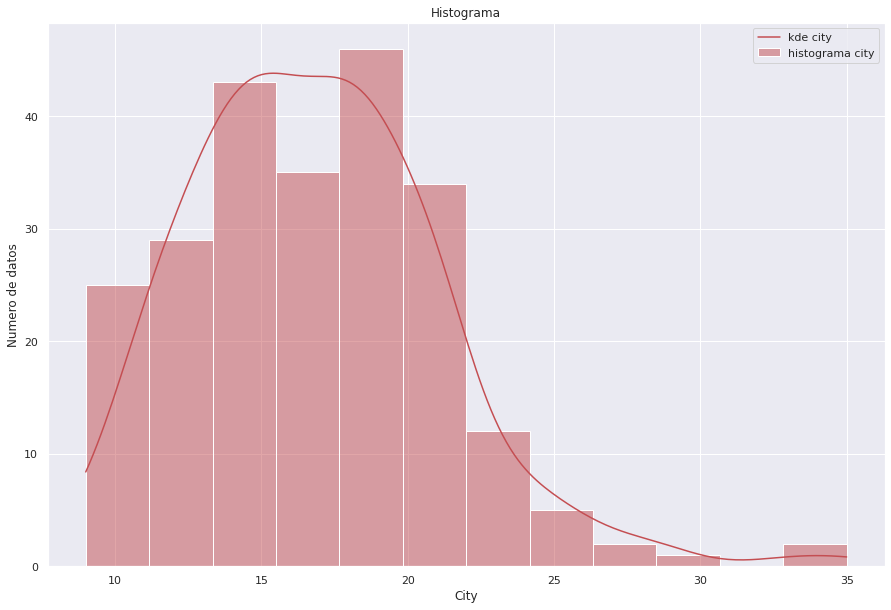

In [ ]:
# Haz un histograma de las variables numéricas cty, hwy (uno para cada variable, en celdas distintas)
fig = plt.figure(figsize=(15,10))

sns.histplot(data = df, x = "cty", bins=12,kde=True, color = "r")


plt.legend(["kde city","histograma city"],loc="best")
plt.title('Histograma')
plt.xlabel('City')
plt.ylabel('Numero de datos')

Text(0, 0.5, 'Numero de datos')

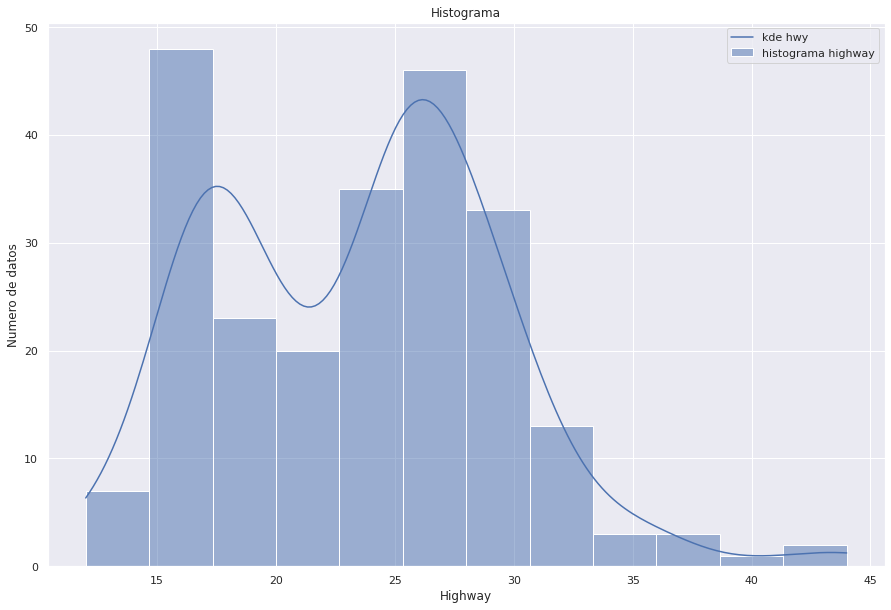

In [ ]:
fig = plt.figure(figsize=(15,10))

sns.histplot(data = df, x = "hwy", bins=12,kde=True, color = "b")

plt.legend(["kde hwy","histograma highway"],loc="best")
plt.title('Histograma')
plt.xlabel('Highway')
plt.ylabel('Numero de datos')

Text(0, 0.5, 'hwy')

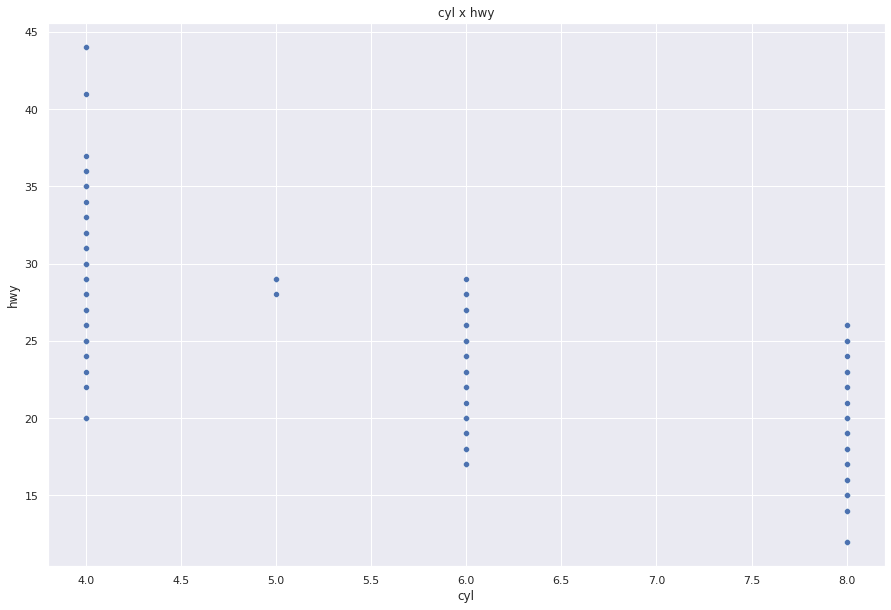

In [58]:
# ¿Cómo se comparar el rendimiento en carretera (hwy) contra el número de cilindros? 
# Haz un gráfico que represente esta relación.
fig = plt.figure(figsize=(15,10))

sns.scatterplot(data =df, y = "hwy", x = "cyl")

plt.title("cyl x hwy")
plt.xlabel("cyl")
plt.ylabel("hwy")

Text(0.5, 1.0, 'Boxplot de la relacion entre cyl y hwy')

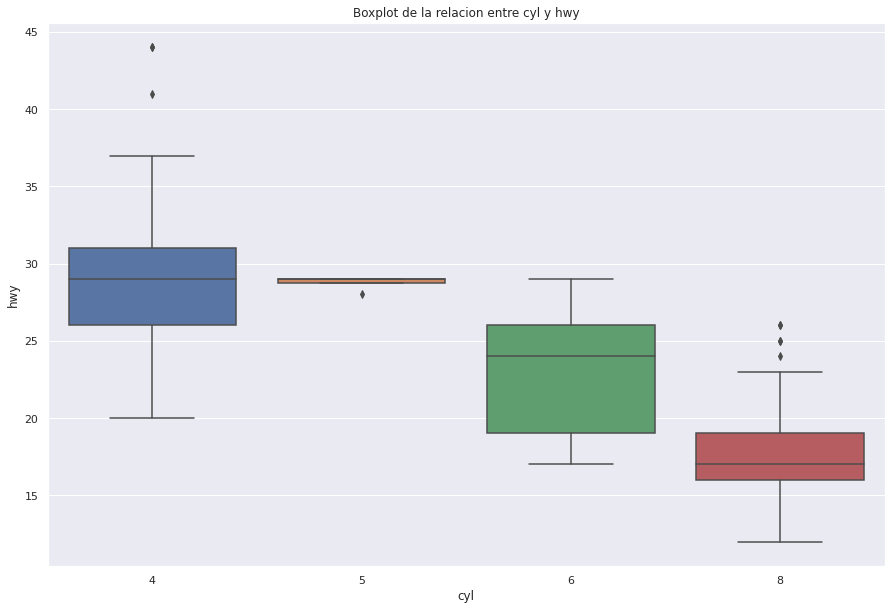

In [59]:
# cyl es una variable numérica, pero como tiene pocos valores podemos tomarla como si fuera categórica.
# ¿De qué otra forma se puede representar la relación de la pregunta anterior? 
# (¿Qué otra gráfica podemos usar?)
# Tamaño de la imagen
fig = plt.figure(figsize=(15,10))
# Gráfico boxplot
sns.boxplot(data = df, x='cyl', y='hwy')
# Ejes y título
plt.title('Boxplot de la relacion entre cyl y hwy')

Text(0, 0.5, 'cty')

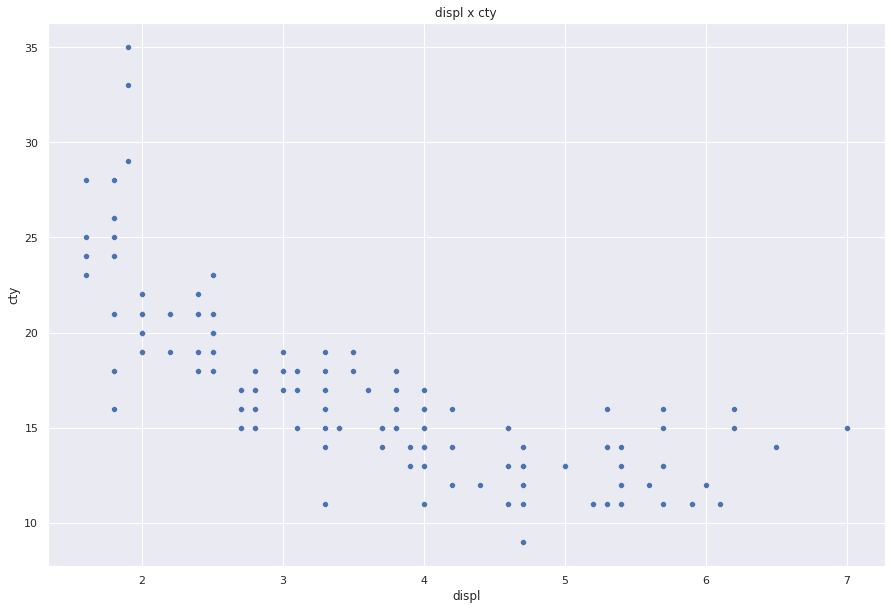

In [ ]:
# Cuál es la relación entre el desplazamiento del motor y el rendimiento dentro de la ciudad?
fig = plt.figure(figsize=(15,10))

sns.scatterplot(data =df, y = "cty", x = "displ")

plt.title("displ x cty")
plt.xlabel("displ")
plt.ylabel("cty")

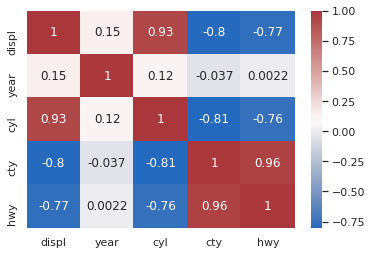

In [ ]:
# ¿Cómo se correlacionan las variables numéricas? Muestra esta correlación en un gráfico. 
# (No tomar en cuenta el año como variable numérica)
# Puedes quitar variables con el método df.drop(['col1', 'col2', ...], axis=1)

df.drop(["manufacturer", "model", "trans", "drv", "fl", "class"], axis = 1)

# Sugerencia: usa la paleta de colores 'vlag' o una paleta DIVERGENTE

sns.heatmap(data = df.corr(), cmap = "vlag", annot = True)

¿Cuales variables tienen una fuerte relación positiva entre sí y cuáles tienen una fuerte relación negativa?  (Esta pregunta no es de código)
